In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.class_weights import calculate_class_weight
from functions.loading_data import load_dataset
from functions.model_running import get_run_number, run_model
from models.efficientnet_v2 import get_v2b3_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'efficientnet_v2_12_v2b3_class_weights_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 32
# dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
# class_weight = calculate_class_weight(dataset, .6)
class_weight = {
    0: 4.528537585685208,
    1: 3.892096468068666,
    2: 3.300900528086318,
    3: 7.75870685219699,
    4: 3.29447516332762,
    5: 2.8658300243916535,
    6: 6.797989842280895}

In [5]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 4.3819 - categorical cross entropy: 1.1999 - mean squared error: 0.0666 - accuracy: 0.6561 - auc: 0.7854 - prc: 0.2690

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_1\assets


251/251 [==============================] - 122s 415ms/step - loss: 4.3819 - categorical cross entropy: 1.1999 - mean squared error: 0.0666 - accuracy: 0.6561 - auc: 0.7854 - prc: 0.2690 - val_loss: 0.8461 - val_categorical cross entropy: 0.8461 - val_mean squared error: 0.0595 - val_accuracy: 0.7175 - val_auc: 0.8919 - val_prc: 0.4324 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - ETA: 0s - loss: 2.9633 - categorical cross entropy: 0.8176 - mean squared error: 0.0559 - accuracy: 0.7093 - auc: 0.8653 - prc: 0.3899

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_2\assets


251/251 [==============================] - 104s 412ms/step - loss: 2.9633 - categorical cross entropy: 0.8176 - mean squared error: 0.0559 - accuracy: 0.7093 - auc: 0.8653 - prc: 0.3899 - val_loss: 0.7815 - val_categorical cross entropy: 0.7815 - val_mean squared error: 0.0518 - val_accuracy: 0.7430 - val_auc: 0.8911 - val_prc: 0.5095 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - 52s 205ms/step - loss: 2.9837 - categorical cross entropy: 0.8209 - mean squared error: 0.0561 - accuracy: 0.7104 - auc: 0.8625 - prc: 0.3895 - val_loss: 0.8017 - val_categorical cross entropy: 0.8017 - val_mean squared error: 0.0563 - val_accuracy: 0.7030 - val_auc: 0.9050 - val_prc: 0.4919 - lr: 0.0010
Epoch 4/100
251/251 [==============================] - 51s 202ms/step - loss: 2.7939 - categorical cross entropy: 0.7751 - mean squared error: 0.0540 - accuracy: 0.7183 - auc: 0.8816 - prc: 0.4214 - val_loss: 0.9424 - val_categorical cross entropy: 0.9424 - val_mean squared error: 0.0613 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_11\assets


251/251 [==============================] - 99s 397ms/step - loss: 2.8593 - categorical cross entropy: 0.7923 - mean squared error: 0.0545 - accuracy: 0.7150 - auc: 0.8761 - prc: 0.4104 - val_loss: 0.7343 - val_categorical cross entropy: 0.7343 - val_mean squared error: 0.0514 - val_accuracy: 0.7495 - val_auc: 0.9057 - val_prc: 0.4991 - lr: 0.0010
Epoch 12/100
251/251 [==============================] - ETA: 0s - loss: 2.8073 - categorical cross entropy: 0.7776 - mean squared error: 0.0536 - accuracy: 0.7241 - auc: 0.8790 - prc: 0.4425

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_12\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_12\assets


251/251 [==============================] - 101s 402ms/step - loss: 2.8073 - categorical cross entropy: 0.7776 - mean squared error: 0.0536 - accuracy: 0.7241 - auc: 0.8790 - prc: 0.4425 - val_loss: 0.7047 - val_categorical cross entropy: 0.7047 - val_mean squared error: 0.0493 - val_accuracy: 0.7565 - val_auc: 0.9044 - val_prc: 0.5346 - lr: 0.0010
Epoch 13/100
251/251 [==============================] - 53s 209ms/step - loss: 2.7576 - categorical cross entropy: 0.7670 - mean squared error: 0.0529 - accuracy: 0.7263 - auc: 0.8844 - prc: 0.4524 - val_loss: 0.7127 - val_categorical cross entropy: 0.7127 - val_mean squared error: 0.0498 - val_accuracy: 0.7480 - val_auc: 0.9020 - val_prc: 0.5110 - lr: 0.0010
Epoch 14/100
251/251 [==============================] - 52s 209ms/step - loss: 2.8006 - categorical cross entropy: 0.7744 - mean squared error: 0.0529 - accuracy: 0.7264 - auc: 0.8819 - prc: 0.4411 - val_loss: 0.7076 - val_categorical cross entropy: 0.7076 - val_mean squared error: 0.048

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_16\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_16\assets


251/251 [==============================] - 106s 423ms/step - loss: 2.7198 - categorical cross entropy: 0.7502 - mean squared error: 0.0519 - accuracy: 0.7303 - auc: 0.8901 - prc: 0.4536 - val_loss: 0.6654 - val_categorical cross entropy: 0.6654 - val_mean squared error: 0.0474 - val_accuracy: 0.7570 - val_auc: 0.9174 - val_prc: 0.5781 - lr: 0.0010
Epoch 17/100
251/251 [==============================] - 54s 212ms/step - loss: 2.6633 - categorical cross entropy: 0.7467 - mean squared error: 0.0522 - accuracy: 0.7335 - auc: 0.8946 - prc: 0.4779 - val_loss: 0.7360 - val_categorical cross entropy: 0.7360 - val_mean squared error: 0.0526 - val_accuracy: 0.7425 - val_auc: 0.8955 - val_prc: 0.5577 - lr: 0.0010
Epoch 18/100
251/251 [==============================] - 53s 213ms/step - loss: 2.7109 - categorical cross entropy: 0.7512 - mean squared error: 0.0521 - accuracy: 0.7357 - auc: 0.8895 - prc: 0.4657 - val_loss: 0.6692 - val_categorical cross entropy: 0.6692 - val_mean squared error: 0.046

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_21\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_21\assets


251/251 [==============================] - 105s 419ms/step - loss: 2.5520 - categorical cross entropy: 0.7099 - mean squared error: 0.0502 - accuracy: 0.7419 - auc: 0.9048 - prc: 0.4883 - val_loss: 0.6405 - val_categorical cross entropy: 0.6405 - val_mean squared error: 0.0454 - val_accuracy: 0.7610 - val_auc: 0.9277 - val_prc: 0.5872 - lr: 0.0010
Epoch 22/100
251/251 [==============================] - 54s 215ms/step - loss: 2.5786 - categorical cross entropy: 0.7210 - mean squared error: 0.0505 - accuracy: 0.7417 - auc: 0.9030 - prc: 0.4883 - val_loss: 0.6880 - val_categorical cross entropy: 0.6880 - val_mean squared error: 0.0471 - val_accuracy: 0.7660 - val_auc: 0.9246 - val_prc: 0.6072 - lr: 0.0010
Epoch 23/100
251/251 [==============================] - 54s 215ms/step - loss: 2.5814 - categorical cross entropy: 0.7188 - mean squared error: 0.0502 - accuracy: 0.7424 - auc: 0.9027 - prc: 0.4856 - val_loss: 0.6871 - val_categorical cross entropy: 0.6871 - val_mean squared error: 0.045

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_36\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_36\assets


251/251 [==============================] - 109s 435ms/step - loss: 2.3271 - categorical cross entropy: 0.6597 - mean squared error: 0.0467 - accuracy: 0.7633 - auc: 0.9177 - prc: 0.5797 - val_loss: 0.6395 - val_categorical cross entropy: 0.6395 - val_mean squared error: 0.0460 - val_accuracy: 0.7715 - val_auc: 0.9263 - val_prc: 0.6294 - lr: 9.5000e-04
Epoch 37/100
251/251 [==============================] - 56s 221ms/step - loss: 2.6912 - categorical cross entropy: 0.7499 - mean squared error: 0.0516 - accuracy: 0.7419 - auc: 0.8919 - prc: 0.4966 - val_loss: 0.6699 - val_categorical cross entropy: 0.6699 - val_mean squared error: 0.0474 - val_accuracy: 0.7605 - val_auc: 0.9196 - val_prc: 0.6262 - lr: 9.5000e-04
Epoch 38/100
251/251 [==============================] - 55s 220ms/step - loss: 2.4221 - categorical cross entropy: 0.6834 - mean squared error: 0.0479 - accuracy: 0.7587 - auc: 0.9087 - prc: 0.5688 - val_loss: 0.6998 - val_categorical cross entropy: 0.6998 - val_mean squared erro

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_39\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_39\assets


251/251 [==============================] - 104s 416ms/step - loss: 2.3108 - categorical cross entropy: 0.6586 - mean squared error: 0.0467 - accuracy: 0.7661 - auc: 0.9207 - prc: 0.5764 - val_loss: 0.6167 - val_categorical cross entropy: 0.6167 - val_mean squared error: 0.0433 - val_accuracy: 0.7825 - val_auc: 0.9193 - val_prc: 0.6523 - lr: 9.5000e-04
Epoch 40/100
251/251 [==============================] - 56s 221ms/step - loss: 2.3254 - categorical cross entropy: 0.6623 - mean squared error: 0.0466 - accuracy: 0.7651 - auc: 0.9219 - prc: 0.5897 - val_loss: 0.6593 - val_categorical cross entropy: 0.6593 - val_mean squared error: 0.0461 - val_accuracy: 0.7660 - val_auc: 0.9105 - val_prc: 0.6310 - lr: 9.5000e-04
Epoch 41/100
251/251 [==============================] - 56s 224ms/step - loss: 2.2786 - categorical cross entropy: 0.6447 - mean squared error: 0.0460 - accuracy: 0.7648 - auc: 0.9245 - prc: 0.5814 - val_loss: 0.6187 - val_categorical cross entropy: 0.6187 - val_mean squared erro

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_44\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_44\assets


251/251 [==============================] - 108s 431ms/step - loss: 2.1466 - categorical cross entropy: 0.6124 - mean squared error: 0.0439 - accuracy: 0.7800 - auc: 0.9310 - prc: 0.6429 - val_loss: 0.5781 - val_categorical cross entropy: 0.5781 - val_mean squared error: 0.0411 - val_accuracy: 0.7895 - val_auc: 0.9360 - val_prc: 0.6811 - lr: 9.5000e-04
Epoch 45/100
251/251 [==============================] - 58s 228ms/step - loss: 2.1477 - categorical cross entropy: 0.6149 - mean squared error: 0.0437 - accuracy: 0.7844 - auc: 0.9318 - prc: 0.6450 - val_loss: 0.6065 - val_categorical cross entropy: 0.6065 - val_mean squared error: 0.0434 - val_accuracy: 0.7750 - val_auc: 0.9339 - val_prc: 0.6753 - lr: 9.5000e-04
Epoch 46/100
251/251 [==============================] - 57s 225ms/step - loss: 2.2331 - categorical cross entropy: 0.6328 - mean squared error: 0.0445 - accuracy: 0.7782 - auc: 0.9271 - prc: 0.6289 - val_loss: 0.6743 - val_categorical cross entropy: 0.6743 - val_mean squared erro

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_60\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_12_v2b3_class_weights_and_bias_20_60\assets


251/251 [==============================] - 109s 435ms/step - loss: 1.8536 - categorical cross entropy: 0.5357 - mean squared error: 0.0387 - accuracy: 0.8067 - auc: 0.9484 - prc: 0.7085 - val_loss: 0.5588 - val_categorical cross entropy: 0.5588 - val_mean squared error: 0.0397 - val_accuracy: 0.8070 - val_auc: 0.9383 - val_prc: 0.7152 - lr: 9.0250e-04
Epoch 61/100
251/251 [==============================] - 57s 224ms/step - loss: 1.8883 - categorical cross entropy: 0.5382 - mean squared error: 0.0386 - accuracy: 0.8049 - auc: 0.9463 - prc: 0.7037 - val_loss: 0.6958 - val_categorical cross entropy: 0.6958 - val_mean squared error: 0.0472 - val_accuracy: 0.7540 - val_auc: 0.9274 - val_prc: 0.6556 - lr: 9.0250e-04
Epoch 62/100
251/251 [==============================] - 57s 227ms/step - loss: 1.9757 - categorical cross entropy: 0.5636 - mean squared error: 0.0404 - accuracy: 0.7941 - auc: 0.9413 - prc: 0.6887 - val_loss: 0.7584 - val_categorical cross entropy: 0.7584 - val_mean squared erro

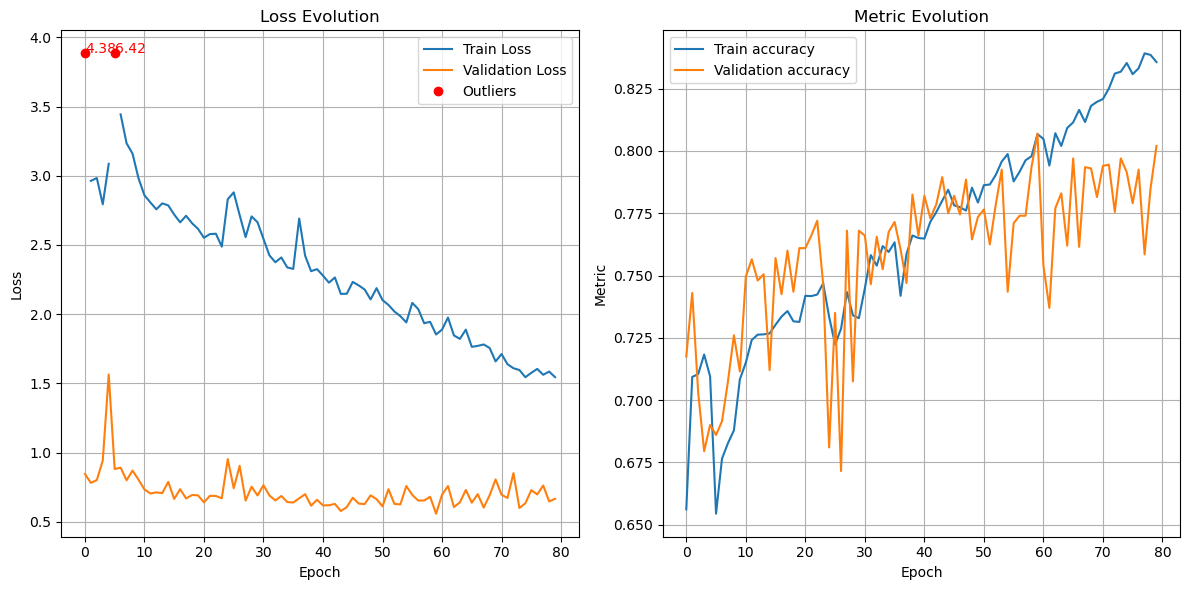

(<keras.engine.functional.Functional at 0x1d7d07d1670>,
 <keras.callbacks.History at 0x1d7d06e51f0>)

In [6]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_v2b3_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    stopping_patience=20)